In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
np.random.seed(42)

In [4]:
single_data_point = np.random.randint(0, 100, 2)
single_data_point

array([51, 92])

In [5]:
single_label = np.random.randint(0, 2)
single_label

0

In [6]:
def generate_data(num_samples, num_features=2):
    """Randomly generates a number of data points"""
    data_size = (num_samples, num_features)
    data = np.random.randint(0, 100, size=data_size)
    labels_size = (num_samples, 1)
    labels = np.random.randint(0,2, size=labels_size)
    return data.astype(np.float32), labels

In [7]:
train_data, labels = generate_data(11)
train_data

array([[71., 60.],
       [20., 82.],
       [86., 74.],
       [74., 87.],
       [99., 23.],
       [ 2., 21.],
       [52.,  1.],
       [87., 29.],
       [37.,  1.],
       [63., 59.],
       [20., 32.]], dtype=float32)

In [8]:
train_data[0], labels[0]

(array([71., 60.], dtype=float32), array([1]))

Text(0,0.5,'y coordinate')

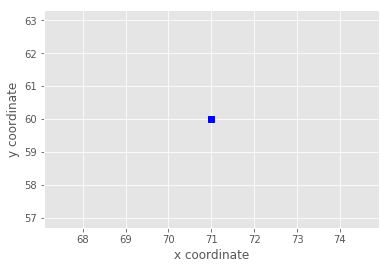

In [9]:
plt.plot(train_data[0, 0], train_data[0, 1], 'sb')
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')

In [10]:
def plot_data(all_blue, all_red):
    plt.figure(figsize=(10, 6))
    plt.scatter(all_blue[:, 0], all_blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(all_red[:, 0], all_red[:, 1], c='r', marker='^', s=180)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

In [11]:
labels.ravel() == 0

array([False, False, False,  True, False,  True,  True,  True,  True,
        True, False])

In [12]:
blue = train_data[labels.ravel() == 0]

In [13]:
red = train_data[labels.ravel() == 1]

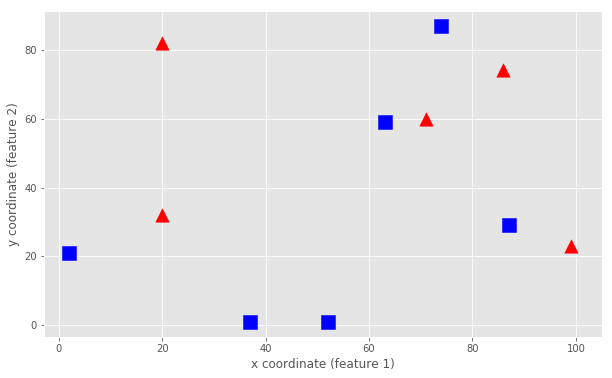

In [14]:
plot_data(blue, red)

In [15]:
knn = cv2.ml.KNearest_create()

In [16]:
knn.train(train_data, cv2.ml.ROW_SAMPLE, labels)

True

In [17]:
newcomer, _ = generate_data(1)
newcomer

array([[91., 59.]], dtype=float32)

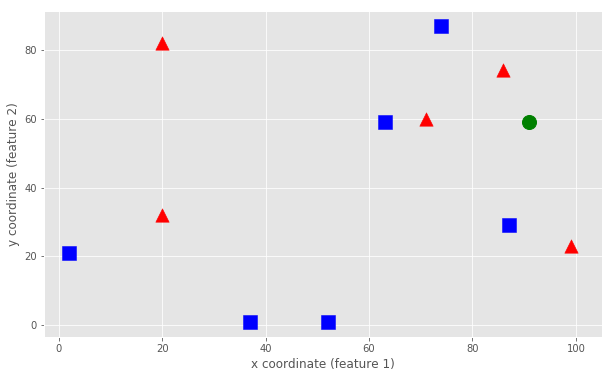

In [18]:
plot_data(blue, red)
plt.plot(newcomer[0, 0], newcomer[0, 1], 'go', markersize=14);

In [19]:
ret, results, neighbor, dist = knn.findNearest(newcomer, 1)
print("Predicted label:\t", results)
print("Neighbor's label:\t", neighbor)
print("Distance to neighbor:\t", dist)

Predicted label:	 [[1.]]
Neighbor's label:	 [[1.]]
Distance to neighbor:	 [[250.]]


In [20]:
ret, results, neighbors, dist = knn.findNearest(newcomer, 7)
print("Predicted label:\t", results)
print("Neighbors' labels:\t", neighbors)
print("Distance to neighbors:\t", dist)

Predicted label:	 [[0.]]
Neighbors' labels:	 [[1. 1. 0. 0. 0. 1. 0.]]
Distance to neighbors:	 [[ 250.  401.  784.  916. 1073. 1360. 4885.]]
